# EDA Implementation - Algerian Forest Fire

### Life cycle of Machine learning Project
* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

### 1. Problem statement.
* The dataset Comprises of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

* If User can Predict that Algerian Forest will Catch Fire or Not based on Input Features.

* Prediction result can be used for Forest Fire Situation Tackers & Make Correct Preventions to Avoid it in future.

### 2. Data Collection.
* The Dataset is collected from Website named, UCI Machine Learning Repository.
* Link for dataset - https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++
* This dataset includes 244 instances that regroup a data of 2 regions of Algeria,namely the Brjajia region located in the     northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria .
122 instances for each region .
* The Period is from June 2012 to September 2012.The Dataset includes 11 attributes and 1 output attribute i.e. Temperature
* The data consists of 14 column and 246 rows.

#### Importing Data and Required Packadges : 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#### Loading dataset : 

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv' , header = 1)

#### Sample Records : 

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


#### Features Information :-

__Period Covered__

* Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

__Weather__

* temperature noon (temperature max) in Celsius degrees
* RH : Relative Humidity in %
* Ws :Wind speed in km/h
* Rain: total day in mm

__FWI Components__

* Fine Fuel Moisture Code (FFMC) index from the FWI system
* Duff Moisture Code (DMC) index from the FWI system
* Drought Code (DC) index from the FWI system
* Initial Spread Index (ISI) index from the FWI system
* Buildup Index (BUI) index from the FWI system
* Fire Weather Index (FWI) Index
* Classes: two classes, namely Fire and not Fire

In [4]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


### 3. Data Cleaning :   

__Removing Unneccesary row from the dataset:__

In [5]:
# We need to remove the 123rd and 124th index that represents the heaqder for other region 

In [6]:
df.loc[120:125,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [7]:
# Dropping row no 122 specifying region name & 123 respecifying the header
df.drop(index=[122,123,124], inplace=True) 

__Resetting the index and dropping the index column__

In [8]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

__Creating a new column called 'Region' representing area as Bejaia and Sidi Bel-abbes__

In [9]:
df.loc[:122,"Region"]='Bejaia'
df.loc[122:,"Region"]='Sidi Bel-abbess'

In [10]:
# Checking Column headers :
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [11]:
df.loc[120:125,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,Bejaia
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,Bejaia
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,Sidi Bel-abbess
123,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,Sidi Bel-abbess
124,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,Sidi Bel-abbess
125,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,Sidi Bel-abbess


#### Removing unnecessary spaces from different features and rows

In [12]:
# Removing Unneccesary space in column headers :
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [13]:
# Stripping the Classes Features data

df.Classes = df.Classes.str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [14]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia


#### Changing Datatype of necessary  columns

In [15]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region         object
dtype: object

In [16]:
#changing datatypes

df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [17]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [18]:
df['Region'] = df['Region'].astype(object)

In [19]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region          object
dtype: object

In [20]:
# Adding New Feature 'Date' by Replacing Unnecessary feature like 'day','month','year'.

df['date'] = pd.to_datetime(df[['year','month','day']])
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [21]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia,2012-06-04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia,2012-06-05


In [22]:
df.dtypes

Temperature             int32
RH                      int32
Ws                      int32
Rain                  float64
FFMC                  float64
DMC                   float64
DC                    float64
ISI                   float64
BUI                   float64
FWI                   float64
Classes                object
Region                 object
date           datetime64[ns]
dtype: object

## 4. EDA

#### Shape of the dataframe

In [23]:
df.shape

(244, 13)

__Observation__:    
There rae 13 columns and 244 rows in the dataframe  


#### Columns 

In [24]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region', 'date'],
      dtype='object')

#### Basic info 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    int32         
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    float64       
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    float64       
 10  Classes      243 non-null    object        
 11  Region       244 non-null    object        
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(3), object(2)
memory usage: 22.0+ KB


__observation:__  
The memory usage is 21.1 kb

#### Dataframe Description

In [26]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.036066
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.425250
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.450000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


### Misssing Data

In [27]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
date           0
dtype: int64

__observation__ :  
    There is only 1 null value in 'Classes' column.    
    
#### Handling Missing Data

* First we will handle this categorical feature by repplacing 0 for 'not fire' and 1 for 'fire'.
* Then we will find median of the 'Classes' columnn and replcae null value with it

In [28]:
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [29]:
df['Classes'] = df['Classes'].map({'not fire':0 , 'fire':1})

In [30]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,Bejaia,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,Bejaia,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,Bejaia,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,Bejaia,2012-06-04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,Bejaia,2012-06-05


In [31]:
# Focus on Replacing Null Value
# The best Way of Replacing Null Value by using mode

df['Classes'].median()

1.0

In [32]:
df['Classes']=df['Classes'].fillna(df['Classes'].median())
df['Classes'] = df['Classes'].astype(object)

In [33]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
date           0
dtype: int64

__Observation:__  
There is now no null value left in the dataframe  

__Column wise memory usage__:

In [34]:
df.memory_usage()

Index           128
Temperature     976
RH              976
Ws              976
Rain           1952
FFMC           1952
DMC            1952
DC             1952
ISI            1952
BUI            1952
FWI            1952
Classes        1952
Region         1952
date           1952
dtype: int64

## Numerical and Categorical Columns  

#### Numerical Columns

In [35]:
num_feat = [fea for fea in df.columns if df[fea].dtypes != 'O']
  
print('We have {} numerical features : {}'.format(len(num_feat), num_feat))

We have 11 numerical features : ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'date']


#### Categorical Columns

In [36]:
cat_feat = [fea for fea in df.columns if df[fea].dtypes == 'O']
  
print('We have {} categorical features : {}'.format(len(cat_feat), cat_feat))

We have 2 categorical features : ['Classes', 'Region']


## Univariate Analysis

In [37]:
df.var()

Temperature      13.204817
RH              221.539415
Ws                7.897102
Rain              3.997623
FFMC            205.565939
DMC             152.968382
DC             2267.606583
ISI              17.433281
BUI             201.777024
FWI              55.134332
Classes           0.246711
dtype: float64

#### Numerical Features

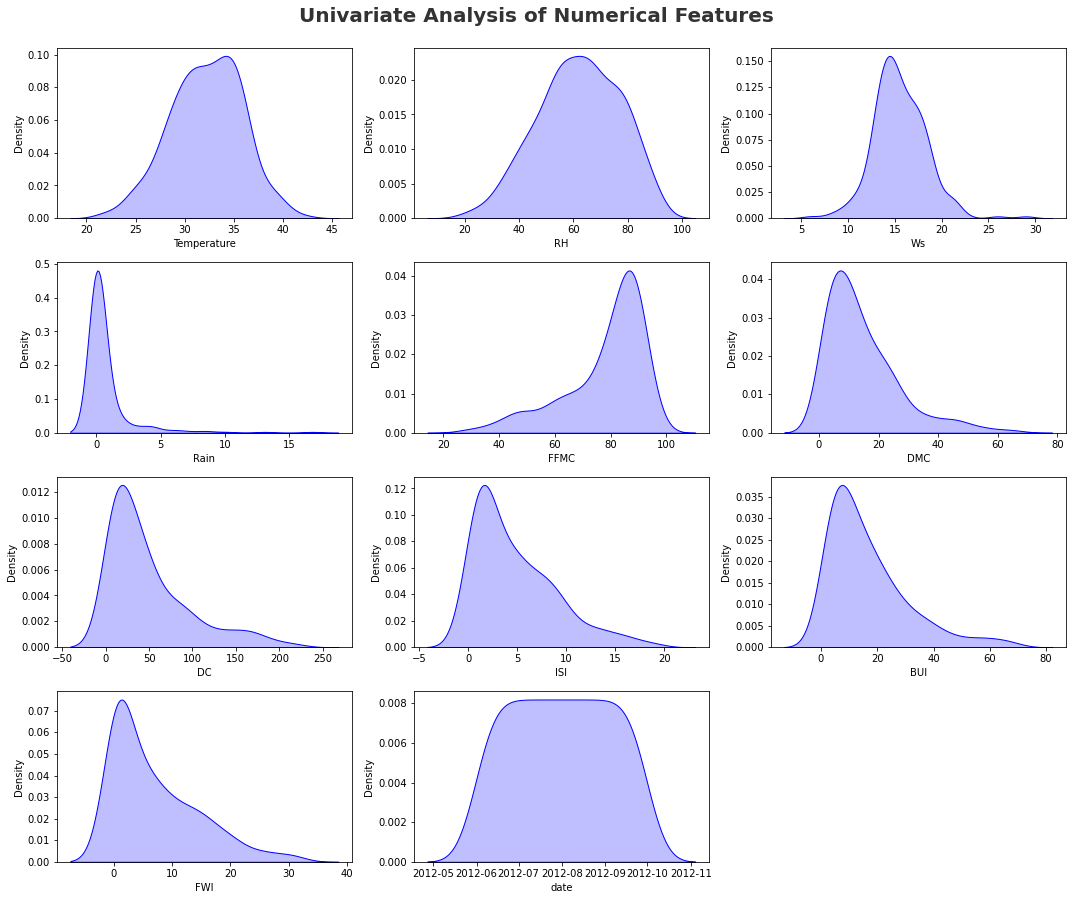

In [38]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_feat)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_feat[i]],shade=True, color='b')
    plt.xlabel(num_feat[i])
    plt.tight_layout()

#### Scatter plot for trend

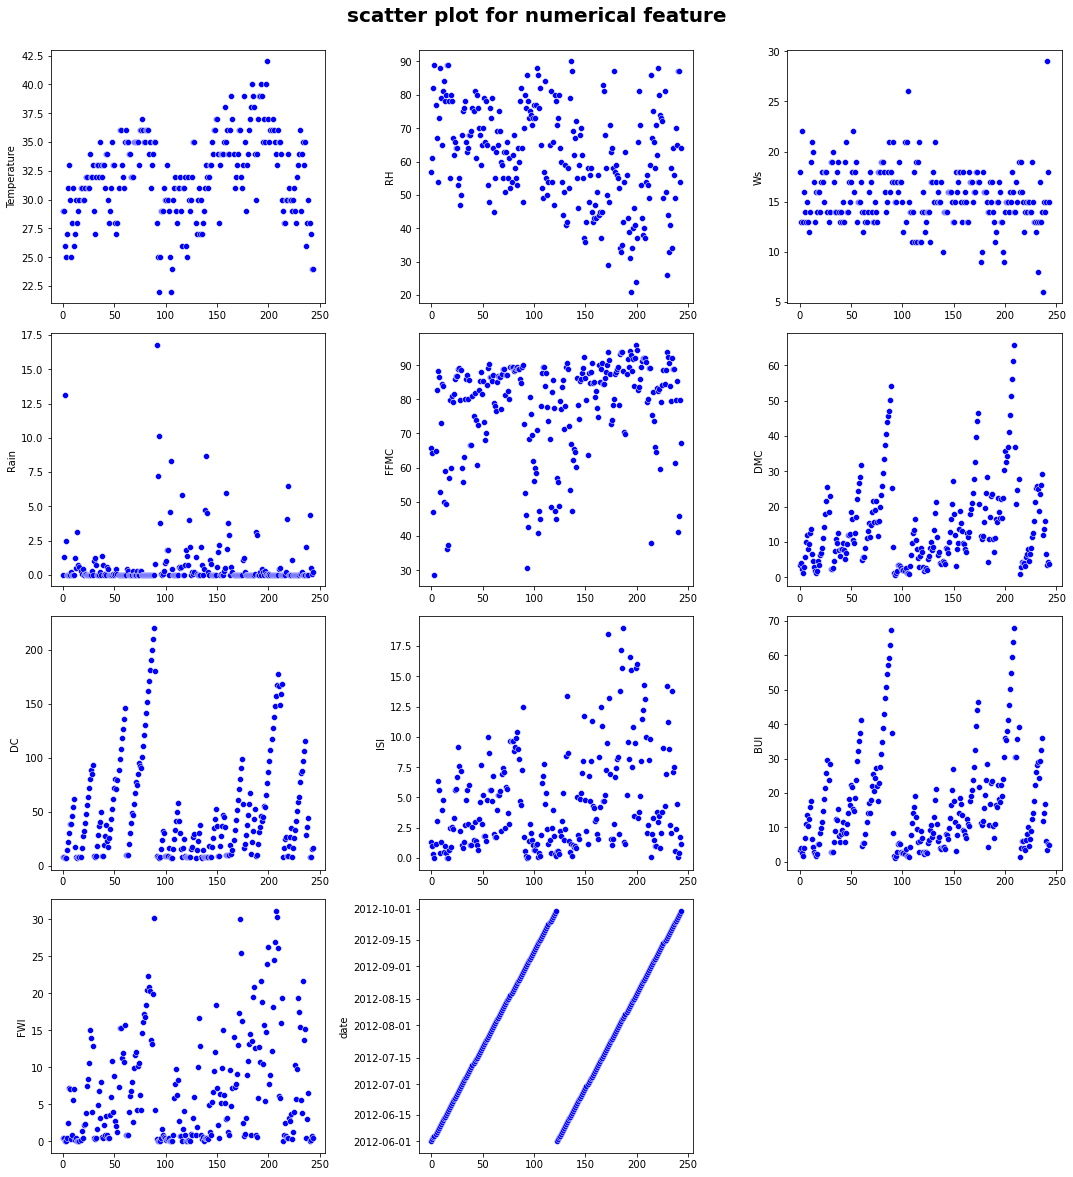

In [39]:
plt.figure(figsize=(15, 20))
plt.suptitle('scatter plot for numerical feature', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(num_feat)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(y=num_feat[i], x=df.index, data=df , color = 'b')
    plt.tight_layout()

#### Categorical Features

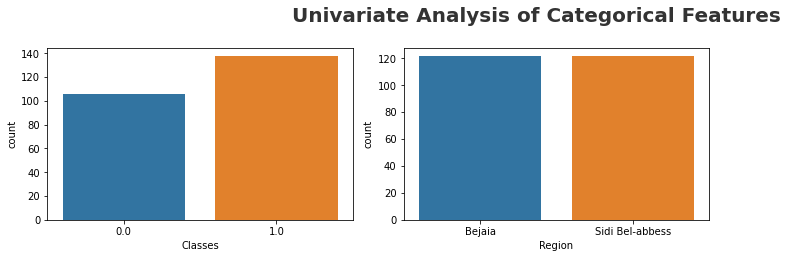

In [40]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(cat_feat)):
    plt.subplot(5, 3, i+1)
    sns.countplot(x=df[cat_feat[i]])
    plt.tight_layout()

## Bivariate Analysis  

#### Correlation between different variables:

In [41]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.564720
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.577730
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.032396
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.324394
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.690358
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875813
DC,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.738647
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.916511
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941906,0.635891,1.000000,0.857587
FWI,0.564720,-0.577730,0.032396,-0.324394,0.690358,0.875813,0.738647,0.916511,0.857587,1.000000


#### Pairplot

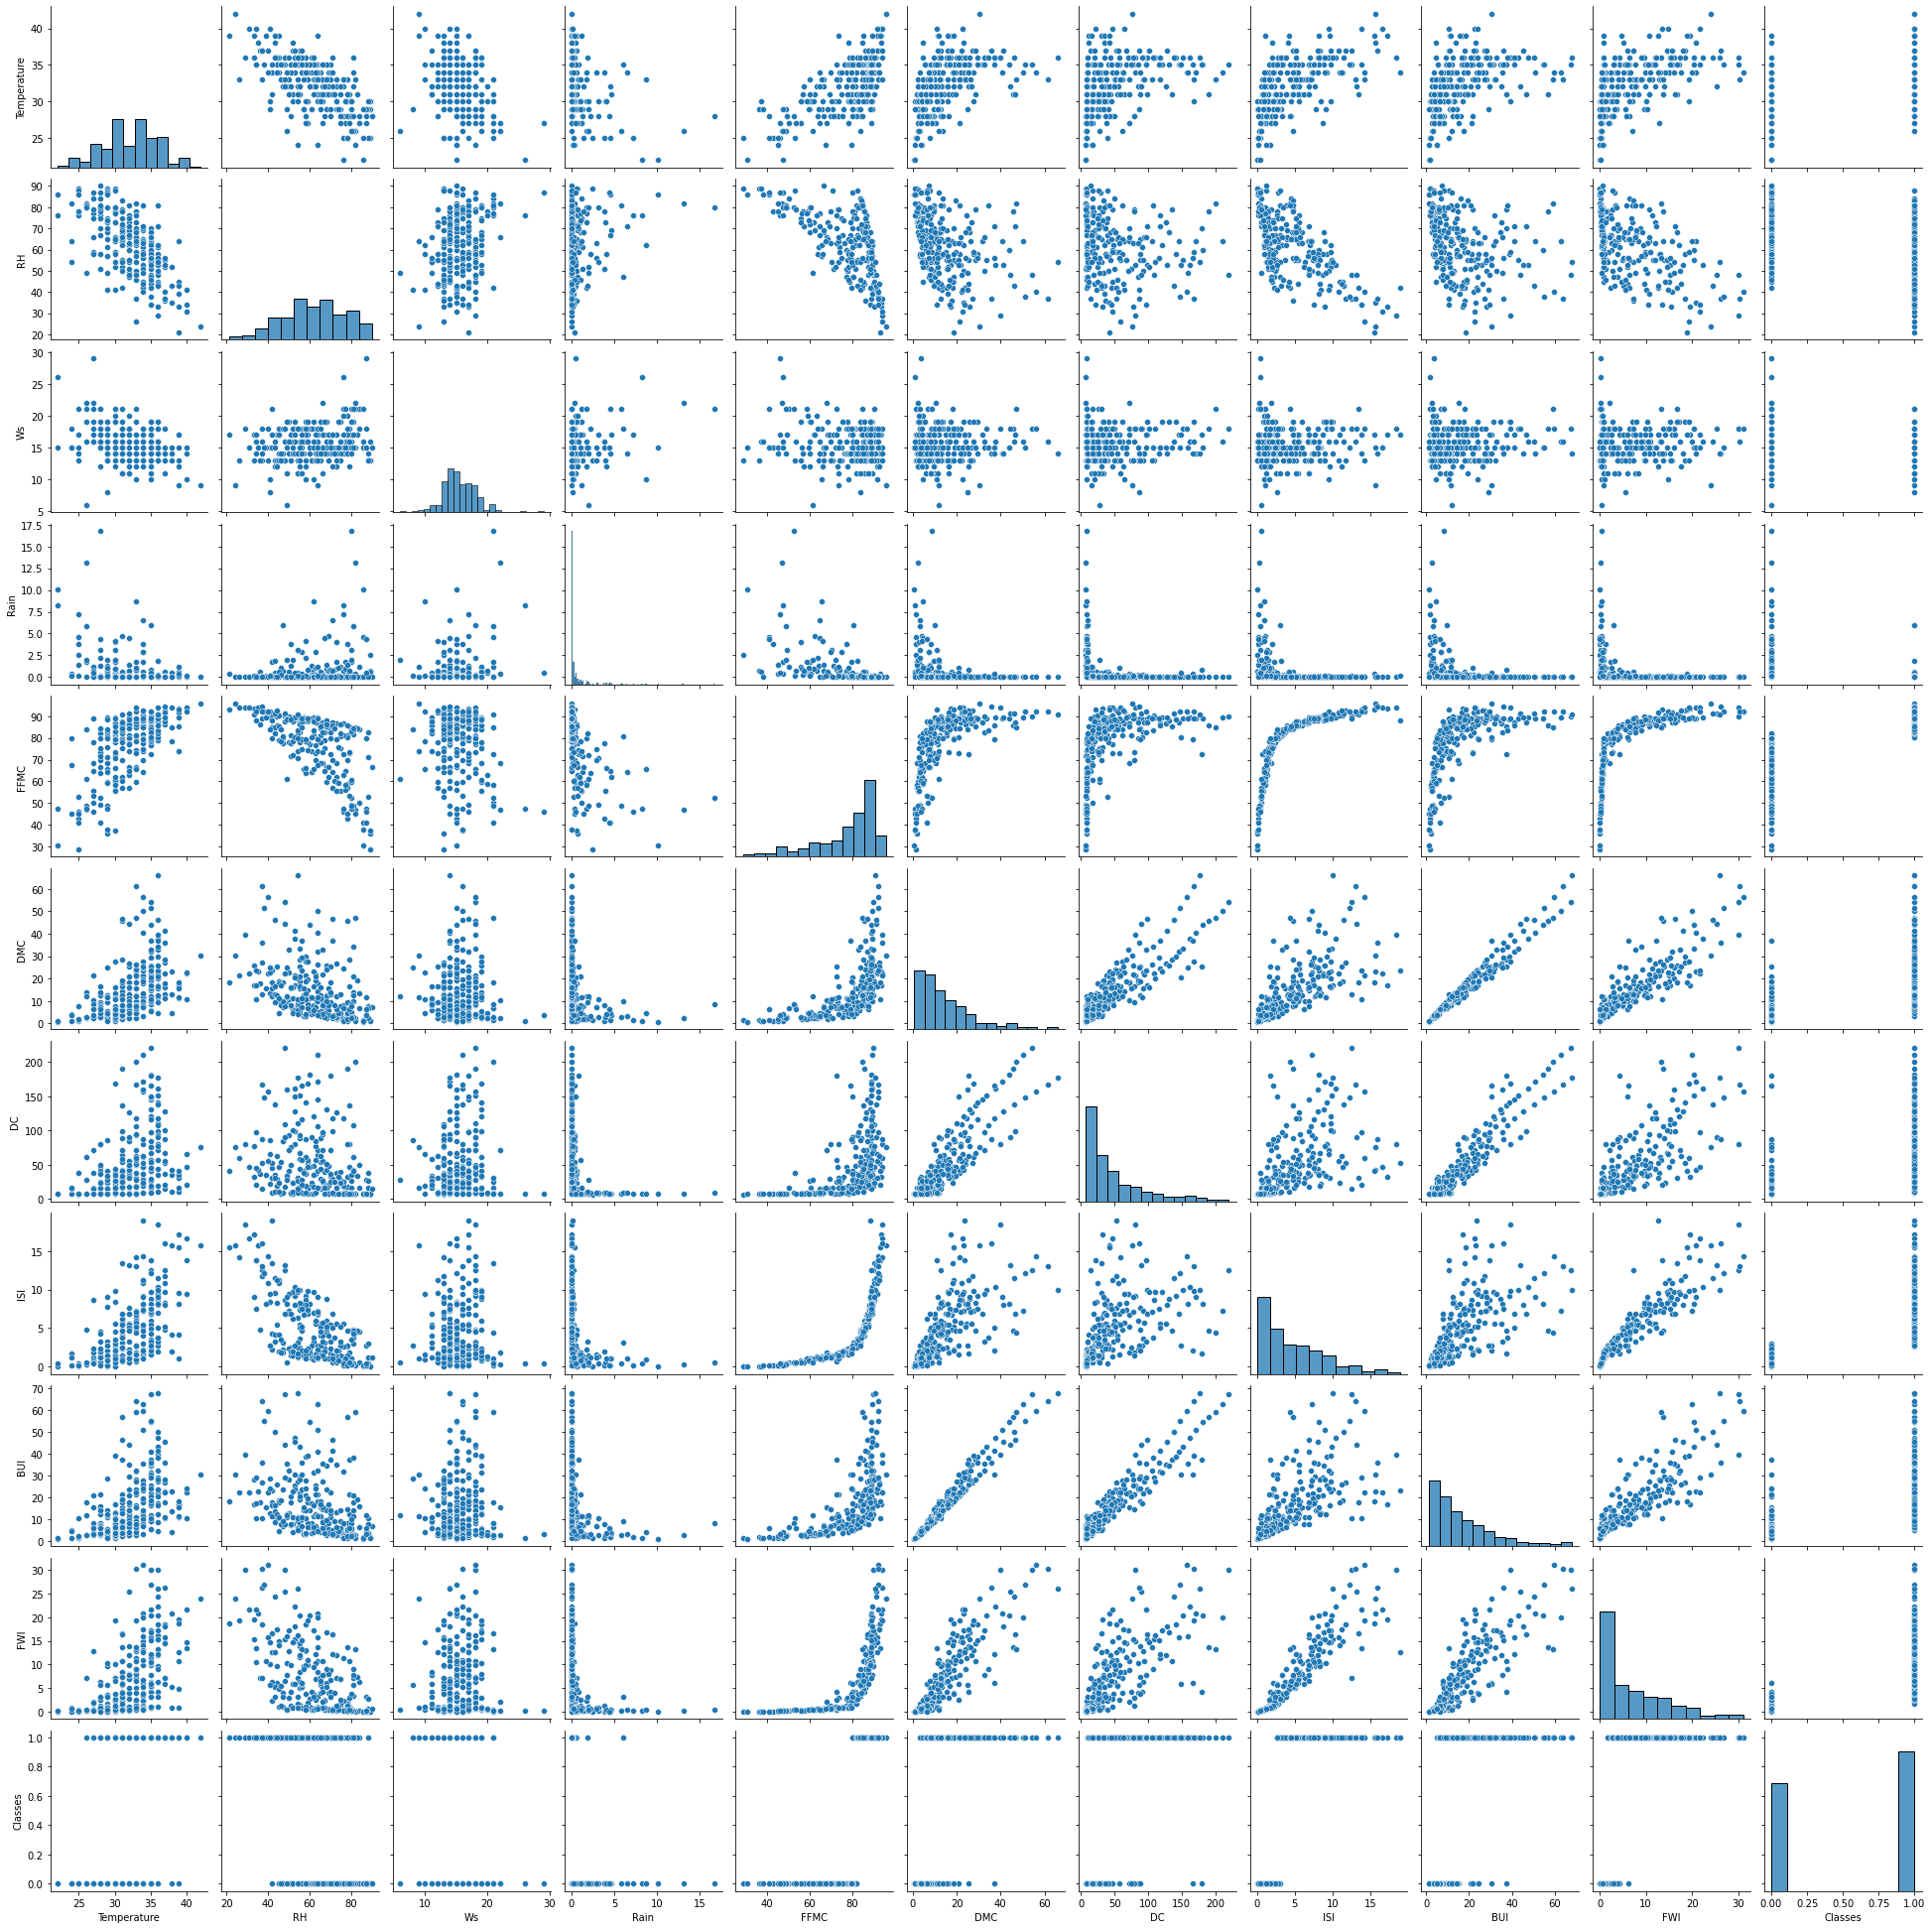

In [42]:
sns.pairplot(data = df)

#### Heatmap for correlation

<AxesSubplot:>

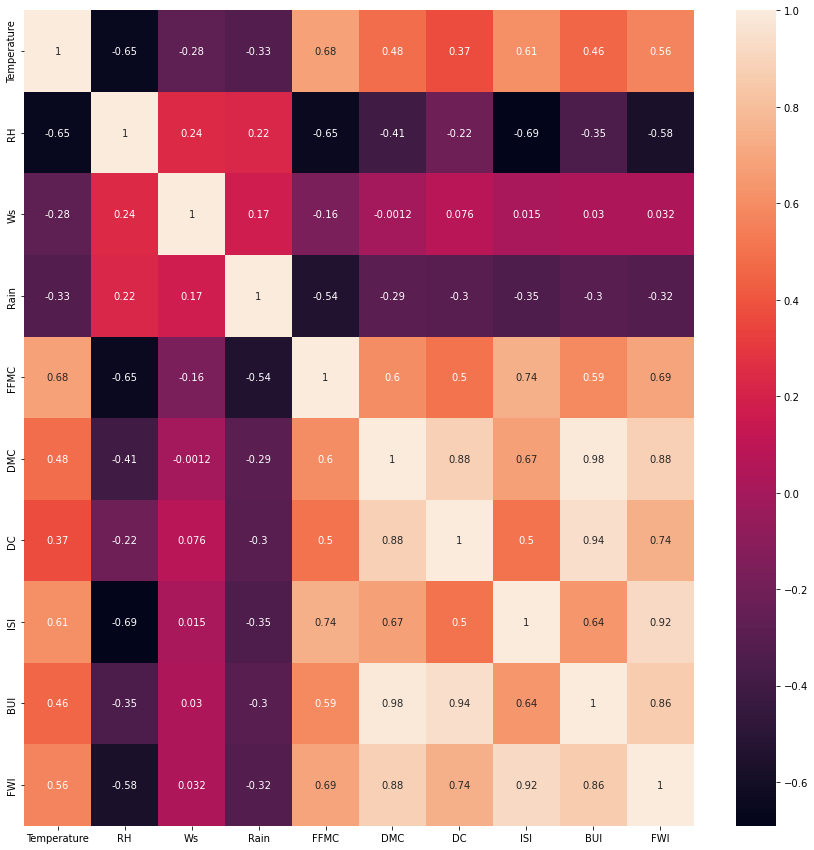

In [43]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True)

__Observation__: 

* RH is negatively corelated with Temperature, FFMC, ISI and FWI
* Rain is negatively correlated with Temperature and FFMC,DMC, ISI and BUI
* FFMC is highly positively correlated with ISI , BUI , DC , DMC and FFMC

#### Strip plot for Numerical fearures and classes

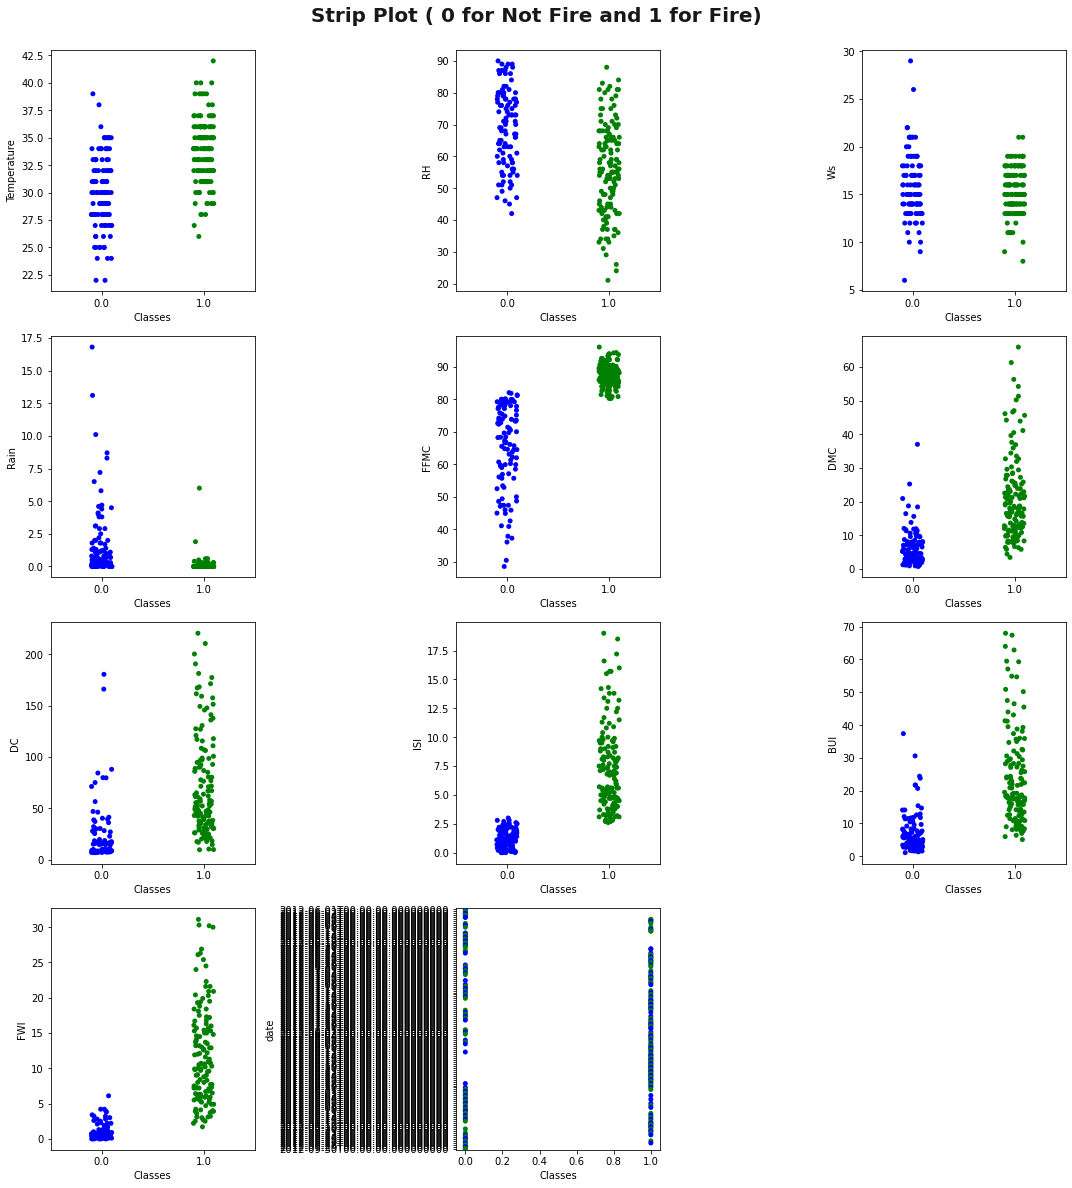

In [44]:
plt.figure(figsize=(15, 20))
plt.suptitle('Strip Plot ( 0 for Not Fire and 1 for Fire)', fontsize=20, fontweight='bold', alpha = 0.9, y=1)
pal = ['blue' , 'green']


for i in range(0, len(num_feat)):
    plt.subplot(5, 3, i+1)
    sns.stripplot(y=num_feat[i], x='Classes', data=df , palette = pal )
    plt.tight_layout()

__Observation:__  

* Regions with Higher Temperature , FFMC , ISI , FWI , BUI  have more chances of Fire
* Temp is directly proportional to Fire and high FFMC has strong Impact on fire

### Boxplot for Outliers:

<AxesSubplot:>

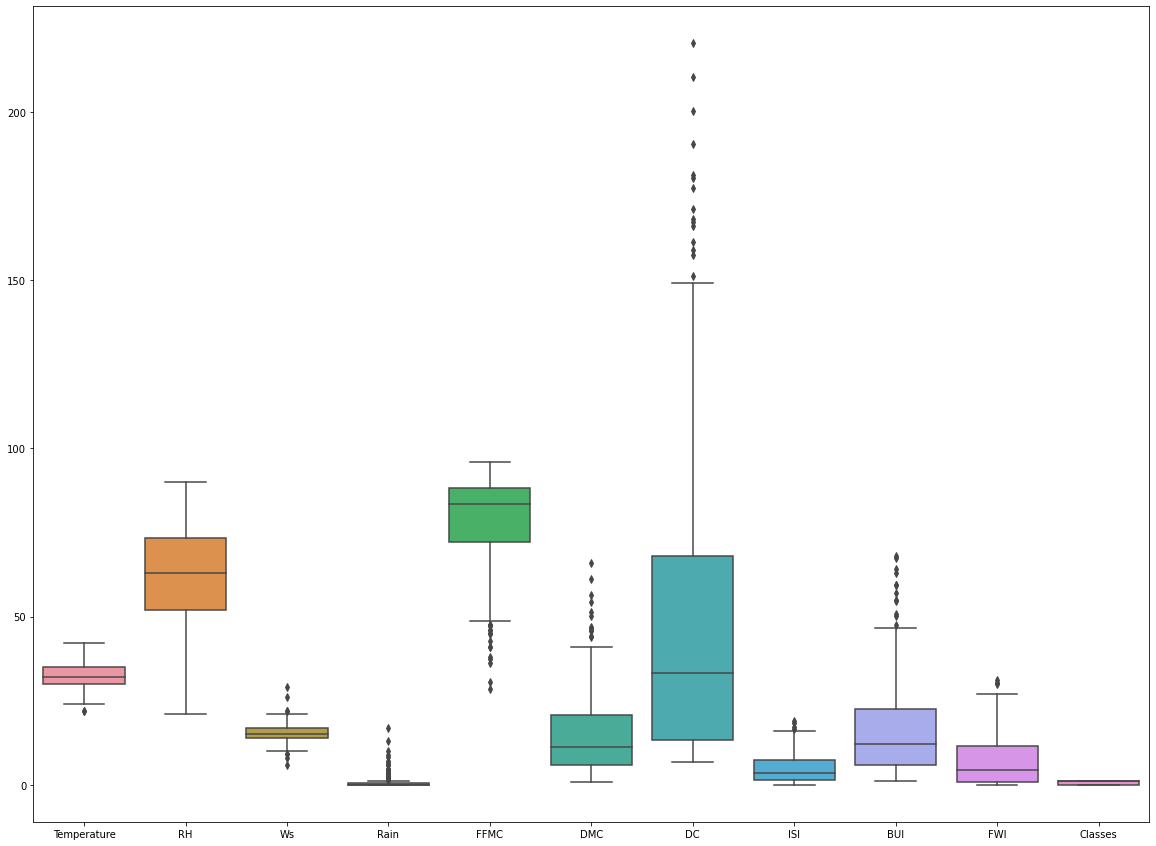

In [45]:
plt.figure(figsize=(20, 15))

sns.boxplot(data = df , orient = "v")

__Observation:__  
* Features like Rain , FFMC, DMC , DC , BUI have many Outliers 

## Graphical Analysis  

### Region where Fire breaks out most times: 

<AxesSubplot:xlabel='Region', ylabel='Classes'>

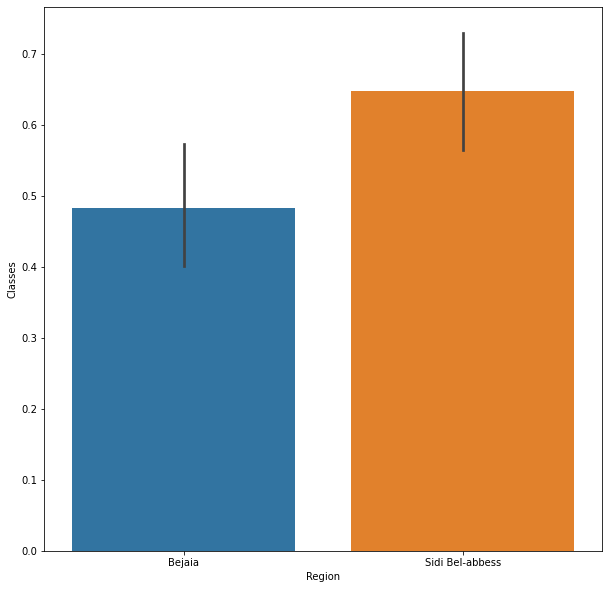

In [46]:
plt.figure(figsize=(10,10)) 
sns.barplot( x = 'Region' , y = 'Classes' , data = df  )

__Observation:__  
The Sidi Bel-abbess region has more cases of Fire breaking Out than Bejaia region    

### Temperature condition in most of areas

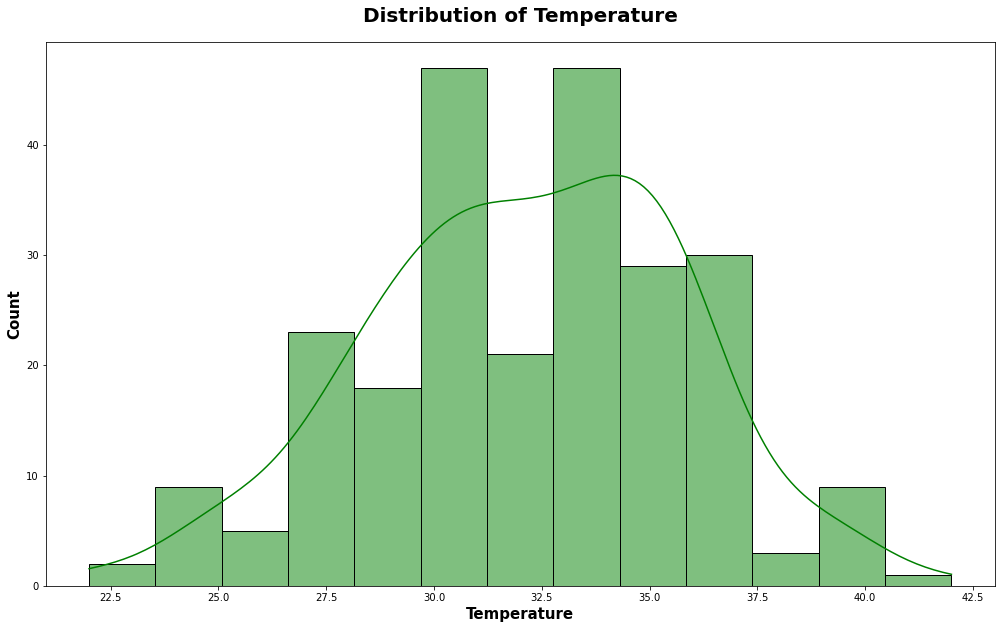

In [47]:
plt.subplots(figsize=(17,10))
sns.histplot("Distribution of Temperature",x=df.Temperature,color='g',kde=True)
plt.title("Distribution of Temperature",weight='bold',fontsize=20,pad=20)
plt.xlabel("Temperature",weight='bold',fontsize=15)
plt.ylabel("Count",weight='bold',fontsize=15)
plt.show()

__Observation:__  
Temperature is mostly between 30-35 degree celcius

### What is the average temperature of different regions ? 

Text(0.5, 1.0, 'Avg Temperature of Both Regions')

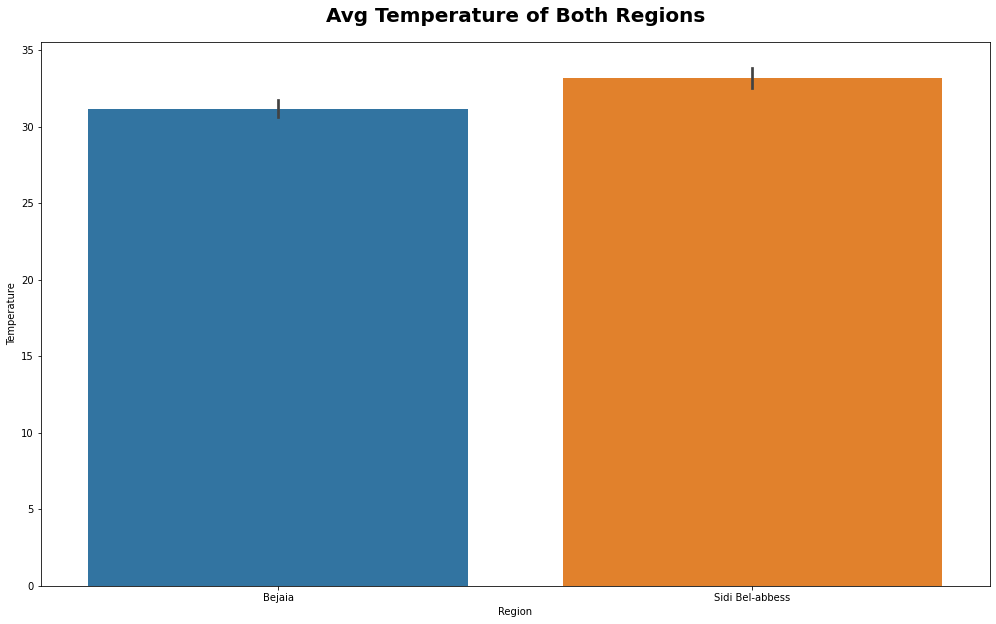

In [48]:
plt.subplots(figsize=(17,10))
sns.barplot(y =df['Temperature'], x = df['Region'] , data = df )
plt.title("Avg Temperature of Both Regions",weight='bold',fontsize=20,pad=20)

__Observation:__  
Sidi Bel-abbess region has comaprarively higher avg temperature than Bejaia region

In [49]:
df['Temperature'].groupby(df['Region']).mean()

Region
Bejaia             31.180328
Sidi Bel-abbess    33.163934
Name: Temperature, dtype: float64

#### Percentage of fire

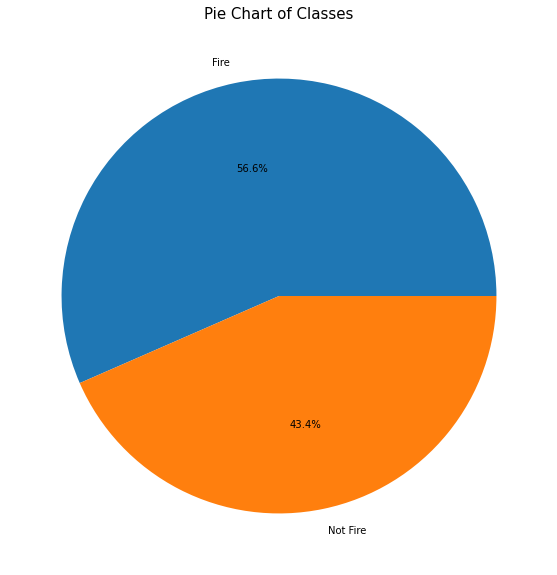

In [50]:
percentage=df.Classes.value_counts(normalize=True)*100
classes_labels=['Fire','Not Fire']
plt.figure(figsize=(15,10))
plt.pie(percentage,labels=classes_labels,autopct="%1.1f%%")
plt.title("Pie Chart of Classes",fontsize=15)
plt.show()

__Observation:__  
On 56.6% of days recorded , Fire broke out 

### Relation between Rain and region

<AxesSubplot:xlabel='Region', ylabel='Rain'>

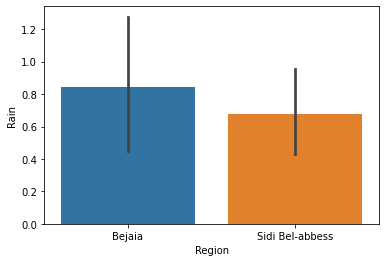

In [51]:
sns.barplot(x="Region",y="Rain",data=df)

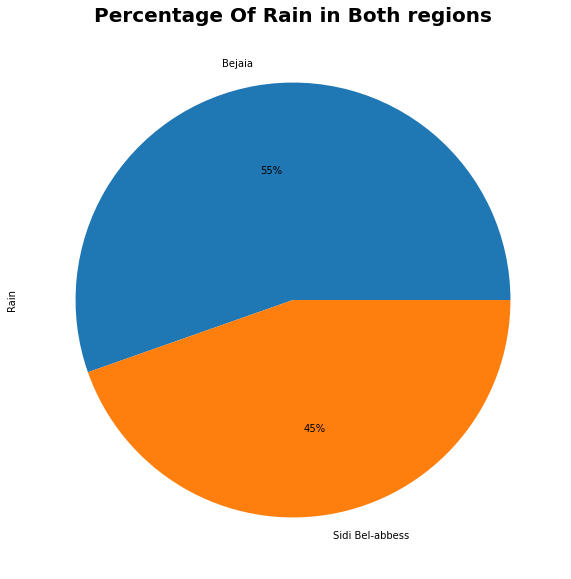

In [101]:
plt.figure(figsize=(10,10))
pal = ['green' ,'blue']
df['Rain'].groupby( df['Region']).mean().plot(kind = 'pie' ,autopct='%.0f%%' )
plt.title('Percentage Of Rain in Both regions' , fontweight = 'bold' , fontsize = 20 )
plt.show()

__Observation:__  
The bejaia region had comparatively more Rain than Sidi bel-abbess region.  

#### Regression plot for effect of TEmperature on different factorrs

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

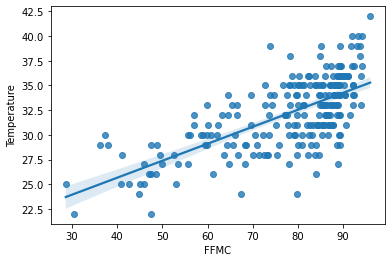

In [159]:
sns.regplot(x='FFMC',y='Temperature',data=df )

AxesSubplot(0.125,0.125;0.775x0.755)


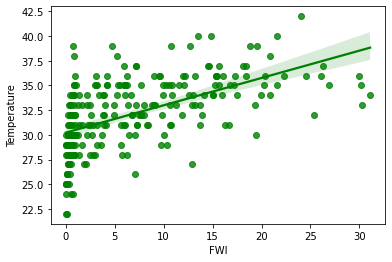

In [165]:
print(sns.regplot(x='FWI',y='Temperature',data=df , color = 'g'))

<AxesSubplot:xlabel='DMC', ylabel='Temperature'>

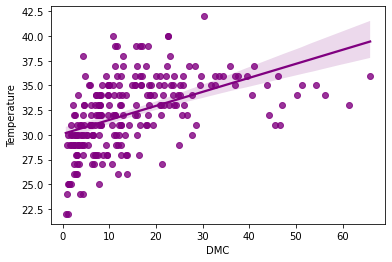

In [166]:
sns.regplot(x='DMC',y='Temperature',data=df , color = 'purple')

<AxesSubplot:xlabel='Rain', ylabel='Temperature'>

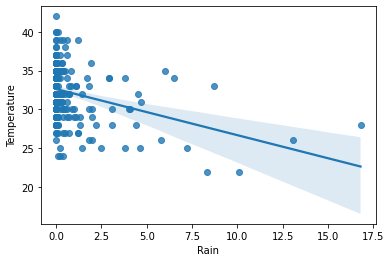

In [173]:
sns.regplot(x='Rain',y='Temperature',data=df)

__Observation:__  
Temperature has  :  
* positive linear relation with FFMC i.e. more the number of cured fine fuels and moisture more is the temperature.
* positive linear relation with FWI i.e. More the temperature , more is the potential of Forest Fire.
* positive linear relation with DMC i.e. More the organic content as moisture , more is the potential of Forest Fire.
* negative linear relation with Rain 

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


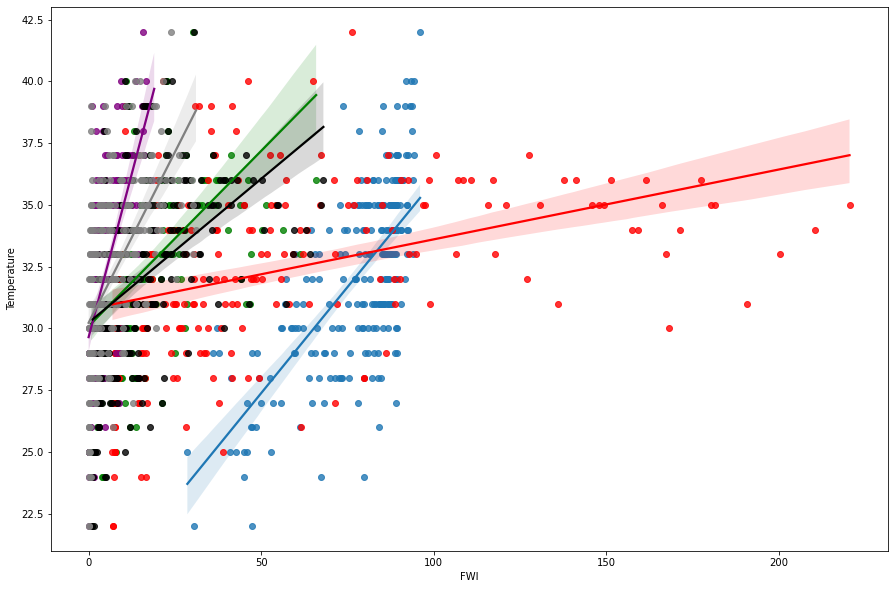

In [171]:
# Regex plot for all FWI components : 

plt.figure(figsize = (15,10))
print(sns.regplot(x='FFMC',y='Temperature',data=df ))
print(sns.regplot(x='DMC',y='Temperature',data=df, color = 'green'))
print(sns.regplot(x='DC',y='Temperature',data=df, color= 'red'))
print(sns.regplot(x='ISI',y='Temperature',data=df, color = 'purple'))
print(sns.regplot(x='BUI',y='Temperature',data=df, color = 'black'))
print(sns.regplot(x='FWI',y='Temperature',data=df , color = 'grey'))

__Observation:__  
Out of all FWI components FFMC and ISI have more Impact on the temperature 

### Which Region had the higher RH ?

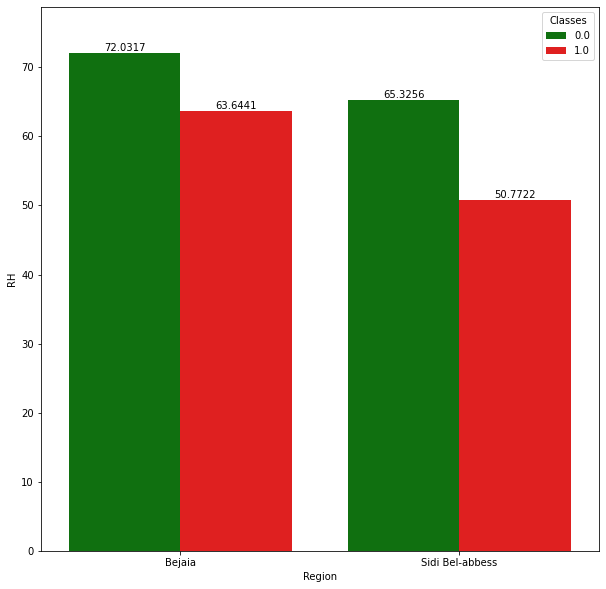

In [151]:
plt.figure(figsize = (10,10))
palette = ['green' ,'red']
ax = sns.barplot(x = "Region" , y = "RH" , hue = 'Classes' , data = df , palette =palette , errwidth = 0 )
for i in ax.containers:
    ax.bar_label(i,)

__Observation:__  
* Bejaia region had more RH value in cae of both Fire and Not Fire



__Final Report__: 

* There are 244 rows and 13 colummn in the dataset, we had to assign and edit some columns name . 
* The target column is Classes which tells us whether there was fire or not on a given day in different regions.
* Features like Rain , FFMC, DMC , DC , BUI have many Outliers.
* Temperature is directly proportional to fire
* Bejaia region was more affected by fire , even if there was more percentage of Rain in that area .
* FFMC and ISI are the main components effecting the growth of the temperature. 
* Bejaia region had more average rainfall and also higher RH 